# Data Modelization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats
%matplotlib inline

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import time
import datetime
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from operator import attrgetter

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import svm, tree
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
import xgboost

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
import statsmodels.api as sm

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

# Import Dataset

In [2]:
# Membaca data dan menghapus kolom Unnamed: 0
df = pd.read_csv('./Datasets/df_clean.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.drop(columns={'Unnamed: 0'}, inplace=True)
df.sort_values(by='order_purchase_timestamp', inplace=True)
df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,revenue
107852,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,14600.0,sao joaquim da barra,SP,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,-20.585751,-47.863693,1.0,81810.0,curitiba,PR,81810.0,-25.507014,-49.275963,15.0,Thursday,9.0,September,2016.0,2016-09,12,47.82
107854,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,14600.0,sao joaquim da barra,SP,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,-20.585751,-47.863693,1.0,81810.0,curitiba,PR,81810.0,-25.507014,-49.275963,15.0,Thursday,9.0,September,2016.0,2016-09,12,47.82
107853,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,14600.0,sao joaquim da barra,SP,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,-20.585751,-47.863693,1.0,81810.0,curitiba,PR,81810.0,-25.507014,-49.275963,15.0,Thursday,9.0,September,2016.0,2016-09,12,47.82
75763,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,4106.0,sao paulo,SP,1.0,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,29.90,15.56,watches_gifts,-23.581451,-46.635029,4.0,85801.0,cascavel,PR,85801.0,-24.959184,-53.462644,3.0,Monday,10.0,October,2016.0,2016-10,9,45.46
110332,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,98280.0,panambi,RS,1.0,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,21.90,17.19,sports_leisure,-28.293541,-53.502238,4.0,15802.0,catanduva,SP,15802.0,-21.143389,-48.995314,3.0,Monday,10.0,October,2016.0,2016-10,16,39.09


In [3]:
# Mengurutkan nilai
df.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'], inplace=True)

In [4]:
len(df)

110848

In [5]:
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,customer_lat,customer_lng,review_score,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_month,order_date_year,order_date_hour,revenue
count,110848.000000,110848.000000,110848.000000,110848.000000,110555.000000,110555.000000,110848.000000,110848.000000,110595.000000,110595.000000,110595.000000,110848.000000,110848.000000,110848.000000,110848.000000,110848.000000
mean,35158.616619,1.198894,119.813602,19.937329,-21.247929,-46.216559,4.066036,24471.836262,24470.308983,-22.798360,-47.241750,15.564828,6.030537,2017.543564,14.749098,139.750931
std,29904.547654,0.708626,181.954146,15.674040,5.556593,4.033253,1.359516,27626.684035,27625.624393,2.700409,2.340320,8.662890,3.232437,0.503899,5.315514,188.965931
min,1003.000000,1.000000,0.850000,0.000000,-33.689948,-72.668881,1.000000,1001.000000,1001.000000,-32.079231,-63.893565,1.000000,1.000000,2016.000000,0.000000,6.080000
25%,11250.000000,1.000000,39.900000,13.080000,-23.592339,-48.124887,4.000000,6429.000000,6440.000000,-23.607576,-48.829744,8.000000,3.000000,2017.000000,11.000000,55.130000
50%,24344.000000,1.000000,74.900000,16.250000,-22.929564,-46.634985,5.000000,13570.000000,13573.000000,-23.425556,-46.750916,16.000000,6.000000,2018.000000,15.000000,91.990000
75%,59068.000000,1.000000,133.900000,21.150000,-20.182732,-43.667690,5.000000,27930.000000,27439.000000,-21.757321,-46.518679,23.000000,8.000000,2018.000000,19.000000,157.340000
max,99980.000000,21.000000,6735.000000,409.680000,42.184003,-8.723762,5.000000,99730.000000,99730.000000,-2.501242,-34.855616,31.000000,12.000000,2018.000000,23.000000,6929.310000


In [6]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name_english', 'customer_lat',
       'customer_lng', 'review_score', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'order_date_day', 'order_date_day_name',
       'order_date_month', 'order_date_month_name', 'order_date_year',
       'order_date_monthyear', 'order_date_hour', 'revenue'],
      dtype='object')

## Waktu Transaksi di dalam dataset

In [7]:
print("Waktu transaksi yang diberikan pada dataset adalah dari rentang tanggal ", df['order_purchase_timestamp'].min(), " hingga ", df['order_purchase_timestamp'].max() )

Waktu transaksi yang diberikan pada dataset adalah dari rentang tanggal  2016-09-15 12:16:38  hingga  2018-08-29 15:00:37


In [8]:
pd.DataFrame(df.groupby(['order_date_monthyear'])['customer_unique_id'].nunique())

,customer_unique_id
order_date_monthyear,
2016-09,1
2016-10,262
2016-12,1
2017-01,718
2017-02,1630
2017-03,2508
2017-04,2274
2017-05,3479
2017-06,3076


- Menggunakan history customer behavior rentang waktu 1 tahun dimulai dari Januari 2017 hingga Desember 2017 untuk memprediksi waktu belanja pelanggan 1 tahun ke depan.

In [9]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name_english', 'customer_lat',
       'customer_lng', 'review_score', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'order_date_day', 'order_date_day_name',
       'order_date_month', 'order_date_month_name', 'order_date_year',
       'order_date_monthyear', 'order_date_hour', 'revenue'],
      dtype='object')

In [10]:
# mengambil data transaksi selama setahun
# dari tanggal 1 Januari 2017 hingga tanggal 31 Desember 2017
df_1y = df[(df.order_purchase_timestamp <= '2017-12-31') & (df.order_purchase_timestamp >= '2017-01-01')]

# mengambil data transaksi selama setahun ke depan
# dari tanggal 1 Januari 2018 hingga tanggal 31 Desember 2018
df_1y_p = df[(df.order_purchase_timestamp >= '2018-01-01') & (df.order_purchase_timestamp <= '2018-12-31')]

In [11]:
# user di 1 tahun pertama
user_1y = pd.DataFrame(df_1y['customer_unique_id'].unique())
user_1y = user_1y.rename(columns={0: 'customer_unique_id'})

In [12]:
user_1y.head()

,customer_unique_id
0,0000f46a3911fa3c0805444483337064
1,0000f6ccb0745a6a4b88665a16c9f078
2,0004aac84e0df4da2b147fca70cf8255
3,0005e1862207bf6ccc02e4228effd9a0
4,0006fdc98a402fceb4eb0ee528f6a8d4


In [13]:
# Total pelanggan pada tahun 2017
len(user_1y)

42066

## Data Extraction
- Prediksi 1 tahun ke depan
- Mencari minimal pembelian pada 1 tahun berikutnya
- Mencari maksimal pembelian pada 1 tahun pertama

In [14]:
# Mencari minimal purchase pada 1 tahun berikutnya
repurchase = df_1y_p.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
repurchase = repurchase.rename(columns={'order_purchase_timestamp': 'min_purchase'})

In [15]:
repurchase.head()

,customer_unique_id,min_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16
3,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23
4,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41


In [16]:
# Mencari Maksimal Purchase pada 1 tahun pertama
lastpurchase = df_1y.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
lastpurchase = lastpurchase.rename(columns={'order_purchase_timestamp': 'max_purchase'})

In [17]:
lastpurchase.head()

,customer_unique_id,max_purchase
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10


In [18]:
purchase_merge = pd.merge(lastpurchase, repurchase, on='customer_unique_id', how='left')

In [19]:
purchase_merge.head()

,customer_unique_id,max_purchase,min_purchase
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,NaT
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,NaT
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,NaT
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,NaT
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,NaT


In [20]:
purchase_merge['RepurchaseDays'] = (purchase_merge['min_purchase'] - purchase_merge['max_purchase']).dt.days

In [21]:
purchase_merge.head()

,customer_unique_id,max_purchase,min_purchase,RepurchaseDays
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,NaT,NaN
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,NaT,NaN
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,NaT,NaN
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,NaT,NaN
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,NaT,NaN


In [22]:
# purchase_merge.RepurchaseDays.unique()

In [23]:
# Menyatukan data pelanggan 1 tahun sebelumnya dengan pelanggan 1 tahun kemudian
customers = pd.merge(user_1y, purchase_merge[['customer_unique_id', 'RepurchaseDays']], on='customer_unique_id', how='left')


In [24]:
customers.head()

,customer_unique_id,RepurchaseDays
0,0000f46a3911fa3c0805444483337064,NaN
1,0000f6ccb0745a6a4b88665a16c9f078,NaN
2,0004aac84e0df4da2b147fca70cf8255,NaN
3,0005e1862207bf6ccc02e4228effd9a0,NaN
4,0006fdc98a402fceb4eb0ee528f6a8d4,NaN


## Handling Null Value

In [25]:
print("Jumlah persentase Null Value (%):\n", round(customers.isnull().sum()/len(customers), 2))

Jumlah persentase Null Value (%):
 customer_unique_id    0.00
RepurchaseDays        0.98
dtype: float64


In [26]:
# Handling Null Value
# Mengisi Null value dengan nilai 999
# karena pelanggan tidak melakukan pembelian kembali di tahun 2018
customers = customers.fillna(999)

In [27]:
# Total Pelanggan yang melakukan pembelian lagi di tahun 2018
len(customers[customers.RepurchaseDays != 999])

641

## Recency, Frequency & Monetary
Perilaku pelanggan ditentukan dengan metode RFM
- Recency: berapa lama sejak pelanggan melakukan pembelian
- Frequency: seberapa sering pelanggan membeli dalam kurun waktu tertentu, kurun waktu transaksi dihitung dari awal waktu dan akhir waktu yang terdapat pada dataset
- Monetary: jumlah pengeluaran pelanggan dalam transaksi

RFM Score (5: besar hingga 1: kecil)
- Recency: semakin cepat score Recency (semakin cepat=semakin kecil) nya semakin besar
- Frequency: semakin banyak pembelian semakin besar score Frequencynya
- Monetary: semakin besar biaya yang dibelanjakan semakin besar score Monetary nya

### RFM (Recency, Frequency, Monetary):
- <i>Recency</i>: waktu antara pembelian awal dan waktu yang ditentukan. Pelanggan yang baru saja membeli barang dianggap lebih responsif terhadap promosi.
- <i>Frequency</i>: Banyaknya pembelian/transaksi pelanggan. Pelanggan yang memiliki banyak transaksi dianggap pelanggan yang memiliki kepuasan yang baik.
- <i>Monetary</i>: Total harga beli tiap pelanggan. Pelanggan dapat dibedakan berdasarkan total pembelian, apakah termasuk kepada pelanggan <i>heavy spenders</i> atau <i>low spenders</i>.

### Recency

In [28]:
recency = df_1y.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency = recency.rename(columns={'order_purchase_timestamp': 'max_purchase'})

In [29]:
recency.head()

,customer_unique_id,max_purchase
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10


In [30]:
recency['Recency'] = ((recency['max_purchase'].max() + timedelta(days=1)) - recency['max_purchase']).dt.days

In [31]:
customers = pd.merge(customers, recency[['customer_unique_id', 'Recency']], on='customer_unique_id')

In [32]:
customers.head()

,customer_unique_id,RepurchaseDays,Recency
0,0000f46a3911fa3c0805444483337064,999.0,296
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80
2,0004aac84e0df4da2b147fca70cf8255,999.0,47
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166


### Frequency

In [33]:
frequency = df_1y.groupby('customer_unique_id')['order_purchase_timestamp'].nunique().reset_index()
frequency = frequency.rename(columns={'order_purchase_timestamp': 'Frequency'})

In [34]:
frequency.head()

,customer_unique_id,Frequency
0,0000f46a3911fa3c0805444483337064,1
1,0000f6ccb0745a6a4b88665a16c9f078,1
2,0004aac84e0df4da2b147fca70cf8255,1
3,0005e1862207bf6ccc02e4228effd9a0,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,1


In [35]:
frequency.Frequency.describe()

count    42066.000000
mean         1.027267
std          0.183195
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Frequency, dtype: float64

In [36]:
customers= pd.merge(customers, frequency, on='customer_unique_id')

In [37]:
customers.head()

,customer_unique_id,RepurchaseDays,Recency,Frequency
0,0000f46a3911fa3c0805444483337064,999.0,296,1
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80,1
2,0004aac84e0df4da2b147fca70cf8255,999.0,47,1
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166,1


### Monetary

In [38]:
monetary = df_1y.groupby('customer_unique_id')['revenue'].sum().reset_index()
monetary = monetary.rename(columns={'revenue': 'Monetary'})

In [39]:
monetary.head()

,customer_unique_id,Monetary
0,0000f46a3911fa3c0805444483337064,86.22
1,0000f6ccb0745a6a4b88665a16c9f078,43.62
2,0004aac84e0df4da2b147fca70cf8255,196.89
3,0005e1862207bf6ccc02e4228effd9a0,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,29.00


In [40]:
customers = pd.merge(customers, monetary, on='customer_unique_id')

In [41]:
customers.head()

,customer_unique_id,RepurchaseDays,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,999.0,296,1,86.22
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80,1,43.62
2,0004aac84e0df4da2b147fca70cf8255,999.0,47,1,196.89
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302,1,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166,1,29.00


## RFM Cluster

In [42]:
rfm = customers.copy()

In [43]:
# Membagi menjadi 5 grup untuk recency dan monetary
rfm_quintiles = rfm[['Recency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8])
rfm_quintiles
# # Membagi menjadi 5 grup untuk recency dan monetary
# rfm_quintiles = rfm[['recency', 'monetary']].quantile([0.2, 0.4, 0.6, 0.8])
# rfm_quintiles


,Recency,Monetary
0.2,37.0,55.60
0.4,91.0,85.60
0.6,155.0,130.47
0.8,230.0,209.40


In [44]:
# Binning Recency dengan quintile
def recency_score(x):
    q1 = rfm_quintiles.loc[0.2, 'Recency']
    q2 = rfm_quintiles.loc[0.4, 'Recency']
    q3 = rfm_quintiles.loc[0.6, 'Recency']
    q4 = rfm_quintiles.loc[0.8, 'Recency']
    
    if x <= q1:
        return 5
    elif q1 < x <= q2:
        return 4
    elif q2 < x <= q3:
        return 3
    elif q4 < x <= q4:
        return 2
    else:
        return 1

# Binning Frequency
def frequency_score(x):
    q = np.quantile(rfm.Frequency.unique(), [0.2, 0.4, 0.6, 0.8])
    if x <= q[0]:
        return 1
    elif q[0] < x <= q[1]:
        return 2
    elif q[1] < x <= q[2]:
        return 3
    elif q[2] < x <= q[3]:
        return 4
    else:
        return 5
    
# def frequency_and_monetary_score(x, col):
#     q1 = rfm_quintiles.loc[0.2, col]
#     q2 = rfm_quintiles.loc[0.4, col]
#     q3 = rfm_quintiles.loc[0.6, col]
#     q4 = rfm_quintiles.loc[0.8, col]
    
#     if x <= q1:
#         return 1
#     elif q1 < x <= q2:
#         return 2
#     elif q2 < x <= q3:
#         return 3
#     elif q4 < x <= q4:
#         return 4
#     else:
#         return 5

def monetary_score(x, col):
    q1 = rfm_quintiles.loc[0.2, col]
    q2 = rfm_quintiles.loc[0.4, col]
    q3 = rfm_quintiles.loc[0.6, col]
    q4 = rfm_quintiles.loc[0.8, col]
    
    if x <= q1:
        return 1
    elif q1 < x <= q2:
        return 2
    elif q2 < x <= q3:
        return 3
    elif q4 < x <= q4:
        return 4
    else:
        return 5
    
# Membuat kolom RFM Score baru
rfm['R_Score'] = rfm['Recency'].apply(lambda x: recency_score(x))
rfm['F_Score'] = rfm['Frequency'].apply(lambda x: frequency_score(x))
rfm['M_Score'] = rfm['Monetary'].apply(lambda x: monetary_score(x, 'Monetary'))

In [45]:
rfm.head()

,customer_unique_id,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,0000f46a3911fa3c0805444483337064,999.0,296,1,86.22,1,1,3
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80,1,43.62,4,1,1
2,0004aac84e0df4da2b147fca70cf8255,999.0,47,1,196.89,4,1,5
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302,1,150.12,1,1,5
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166,1,29.00,1,1,1


In [46]:
rfm['RFM_Total_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [47]:
rfm.head()

,customer_unique_id,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score
0,0000f46a3911fa3c0805444483337064,999.0,296,1,86.22,1,1,3,5
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80,1,43.62,4,1,1,6
2,0004aac84e0df4da2b147fca70cf8255,999.0,47,1,196.89,4,1,5,10
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302,1,150.12,1,1,5,7
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166,1,29.00,1,1,1,3


In [48]:
rfm.groupby('RFM_Total_Score')['Recency'].count()

RFM_Total_Score
3      3552
4      3336
5      4935
6      3367
7     11480
8      3308
9      5128
10     3434
11     3504
12       15
13        3
14        4
Name: Recency, dtype: int64

In [49]:
rfm['Segment'] = 'Low-Tier'
rfm.loc[rfm['RFM_Total_Score'] > 6, 'Segment'] = 'Mid-Tier'
rfm.loc[rfm['RFM_Total_Score'] > 9, 'Segment'] = 'High-Tier'

In [50]:
rfm['Segment'].value_counts()

Mid-Tier     19916
Low-Tier     15190
High-Tier     6960
Name: Segment, dtype: int64

In [51]:
rfm.head()

,customer_unique_id,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score,Segment
0,0000f46a3911fa3c0805444483337064,999.0,296,1,86.22,1,1,3,5,Low-Tier
1,0000f6ccb0745a6a4b88665a16c9f078,999.0,80,1,43.62,4,1,1,6,Low-Tier
2,0004aac84e0df4da2b147fca70cf8255,999.0,47,1,196.89,4,1,5,10,High-Tier
3,0005e1862207bf6ccc02e4228effd9a0,999.0,302,1,150.12,1,1,5,7,Mid-Tier
4,0006fdc98a402fceb4eb0ee528f6a8d4,999.0,166,1,29.00,1,1,1,3,Low-Tier


## New Feature
- Membuat fitur previous purchase untuk mendapatkan data pembeli melakukan transaksi pada tanggal berapa saja selama tahun 2017
- Membuat fitur diff_day untuk mengetahui selang waktu pelanggan melakukan pembelian pertama, kedua dan ketiga

In [52]:
order = df_1y[['customer_unique_id', 'order_purchase_timestamp']]

In [53]:
order['date'] = df_1y['order_purchase_timestamp'].dt.date

In [54]:
order.head()

,customer_unique_id,order_purchase_timestamp,date
45264,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10
35815,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12
46212,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14
33066,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017-03-04
10543,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2017-07-18


In [55]:
order = order.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

In [56]:
len(order)

49876

In [57]:
order = order.drop_duplicates(subset=['customer_unique_id', 'order_purchase_timestamp'], keep='first')

In [58]:
order.head()

,customer_unique_id,order_purchase_timestamp,date
45264,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10
35815,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12
46212,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14
33066,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017-03-04
10543,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2017-07-18


In [59]:
len(order)

43213

In [60]:
order.customer_unique_id.duplicated().sum()

1147

In [61]:
order['previous_purchase'] = order.groupby('customer_unique_id')['date'].shift(1)
order['previous_2_purchase'] = order.groupby('customer_unique_id')['date'].shift(2)
order['previous_3_purchase'] = order.groupby('customer_unique_id')['date'].shift(3)

order['diff_day_1'] = (order['date'] - order['previous_purchase']).dt.days
order['diff_day_2'] = (order['date'] - order['previous_2_purchase']).dt.days
order['diff_day_3'] = (order['date'] - order['previous_3_purchase']).dt.days

In [62]:
order.head()

,customer_unique_id,order_purchase_timestamp,date,previous_purchase,previous_2_purchase,previous_3_purchase,diff_day_1,diff_day_2,diff_day_3
45264,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10,NaN,NaN,NaN,NaN,NaN,NaN
35815,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12,NaN,NaN,NaN,NaN,NaN,NaN
46212,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14,NaN,NaN,NaN,NaN,NaN,NaN
33066,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017-03-04,NaN,NaN,NaN,NaN,NaN,NaN
10543,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# order['previous_purchase'].unique()

In [64]:
order[order.customer_unique_id.duplicated()].tail()

,customer_unique_id,order_purchase_timestamp,date,previous_purchase,previous_2_purchase,previous_3_purchase,diff_day_1,diff_day_2,diff_day_3
28047,fe81bb32c243a86b2f86fbf053fe6140,2017-10-31 16:20:25,2017-10-31,2017-10-22,NaN,NaN,9.0,NaN,NaN
66976,fed2005ccab4fcf1a40ebdaff032a148,2017-06-17 17:04:31,2017-06-17,2017-06-17,NaN,NaN,0.0,NaN,NaN
13104,ff8892f7c26aa0446da53d01b18df463,2017-11-26 23:25:43,2017-11-26,2017-05-24,NaN,NaN,186.0,NaN,NaN
100991,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-23 13:15:29,2017-08-23,2017-02-22,NaN,NaN,182.0,NaN,NaN
79859,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09-14 14:24:04,2017-09-14,2017-08-23,2017-02-22,NaN,22.0,204.0,NaN


In [65]:
order = order.drop_duplicates(subset=['customer_unique_id'], keep='last')

In [66]:
order = order.drop(columns=['previous_3_purchase', 'diff_day_3'])

In [67]:
order = order.drop(columns=['previous_2_purchase', 'diff_day_2'])

In [68]:
order.head()

,customer_unique_id,order_purchase_timestamp,date,previous_purchase,diff_day_1
45264,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10,NaN,NaN
35815,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12,NaN,NaN
46212,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14,NaN,NaN
33066,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017-03-04,NaN,NaN
10543,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2017-07-18,NaN,NaN


In [69]:
order = order.dropna()

In [70]:
len(order)

1041

In [71]:
order.head()

,customer_unique_id,order_purchase_timestamp,date,previous_purchase,diff_day_1
8167,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,2017-03-21,2017-03-21,0.0
50790,013f4353d26bb05dc6652f1269458d8d,2017-11-28 13:30:58,2017-11-28,2017-11-24,4.0
42173,015557c9912277312b9073947804a7ba,2017-05-01 14:48:33,2017-05-01,2017-03-23,39.0
95962,01c289bb06354cdc7e6549570f20ada4,2017-12-26 21:14:43,2017-12-26,2017-06-03,206.0
54575,02168ea18740a0fdaaa15f11bebba5db,2017-10-09 22:05:59,2017-10-09,2017-08-20,50.0


In [72]:
merge_data = pd.merge(order,rfm, on='customer_unique_id')

In [73]:
merge_data.head()

,customer_unique_id,order_purchase_timestamp,date,previous_purchase,diff_day_1,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score,Segment
0,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,2017-03-21,2017-03-21,0.0,999.0,285,2,252.40,1,1,5,7,Mid-Tier
1,013f4353d26bb05dc6652f1269458d8d,2017-11-28 13:30:58,2017-11-28,2017-11-24,4.0,999.0,33,2,356.39,5,1,5,11,High-Tier
2,015557c9912277312b9073947804a7ba,2017-05-01 14:48:33,2017-05-01,2017-03-23,39.0,999.0,244,2,315.12,1,1,5,7,Mid-Tier
3,01c289bb06354cdc7e6549570f20ada4,2017-12-26 21:14:43,2017-12-26,2017-06-03,206.0,999.0,5,2,242.50,5,1,5,11,High-Tier
4,02168ea18740a0fdaaa15f11bebba5db,2017-10-09 22:05:59,2017-10-09,2017-08-20,50.0,999.0,83,2,264.04,4,1,5,10,High-Tier


In [440]:
data_fin = merge_data.copy()

In [441]:
data_fin = merge_data[['diff_day_1', 'RepurchaseDays', 'Recency',
       'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Total_Score', 'Segment']]

## Encode Data

In [442]:
data_fin = pd.get_dummies(data_fin)

In [443]:
data_fin.head()

,diff_day_1,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score,Segment_High-Tier,Segment_Low-Tier,Segment_Mid-Tier
0,0.0,999.0,285,2,252.40,1,1,5,7,0,0,1
1,4.0,999.0,33,2,356.39,5,1,5,11,1,0,0
2,39.0,999.0,244,2,315.12,1,1,5,7,0,0,1
3,206.0,999.0,5,2,242.50,5,1,5,11,1,0,0
4,50.0,999.0,83,2,264.04,4,1,5,10,1,0,0


In [444]:
# data_fin.RepurchaseDays.value_counts()

## Target
- Yang akan menjadi target adalah keberadaan pelanggan (repurchase) pada selang waktu 2017 dan 2018
- Jika dalam selang periode pelanggan membeli lagi dalam selang waktu 120 hari maka akan dikategorikan pada Class 1 dan yang dibawah 120 hari akan dikategorikan pada Class 2
- Jika dalam selang periode pelanggan membeli lagi dalam selang waktu > 240 akan dikategorikan pada Class 0
- Class 0 dianggap berpotensi churn karena pelanggan membeli kembali dalam rentang waktu diatas 6 bulan atau tidak membeli lagi di tahun depannya, padahal bisa saja pelanggan tersebut melakukan transaksi lebih dari sekali pada tahun sebelumnya
- Class 1 dianggap hampir berpotensi churn dan Class 2 merupakan pelanggan yang diharapkan perusahaan

In [445]:
data_fin['Target'] = 2
data_fin.loc[data_fin.RepurchaseDays > 120, 'Target'] = 1
data_fin.loc[data_fin.RepurchaseDays > 240, 'Target'] = 0

In [446]:
data_fin.head()

,diff_day_1,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score,Segment_High-Tier,Segment_Low-Tier,Segment_Mid-Tier,Target
0,0.0,999.0,285,2,252.40,1,1,5,7,0,0,1,0
1,4.0,999.0,33,2,356.39,5,1,5,11,1,0,0,0
2,39.0,999.0,244,2,315.12,1,1,5,7,0,0,1,0
3,206.0,999.0,5,2,242.50,5,1,5,11,1,0,0,0
4,50.0,999.0,83,2,264.04,4,1,5,10,1,0,0,0


In [447]:
data_fin.Target.value_counts()

0    999
1     25
2     17
Name: Target, dtype: int64

## Data Summary

In [448]:
data_fin_summary = pd.DataFrame({
    'columns': data_fin.columns,
    'null_value_total': [data_fin[i].isnull().sum() for i in data_fin.columns],
    'unique_value_total': [data_fin[i].nunique() for i in data_fin.columns],
    'length': [data_fin[i].shape[0] for i in data_fin.columns],
    'data_type': [data_fin[i].dtypes for i in data_fin.columns]
})
data_fin_summary ['null_value_total_pct'] = round(data_fin_summary['null_value_total'] / data_fin_summary['length'] * 100, 2)
data_fin_summary = data_fin_summary[['columns', 'null_value_total', 'null_value_total_pct', 'unique_value_total', 'length', 'data_type']]
data_fin_summary 

,columns,null_value_total,null_value_total_pct,unique_value_total,length,data_type
0,diff_day_1,0,0.0,212,1041,float64
1,RepurchaseDays,0,0.0,49,1041,float64
2,Recency,0,0.0,299,1041,int64
3,Frequency,0,0.0,6,1041,int64
4,Monetary,0,0.0,1026,1041,float64
5,R_Score,0,0.0,4,1041,int64
6,F_Score,0,0.0,5,1041,int64
7,M_Score,0,0.0,4,1041,int64
8,RFM_Total_Score,0,0.0,12,1041,int64
9,Segment_High-Tier,0,0.0,2,1041,uint8


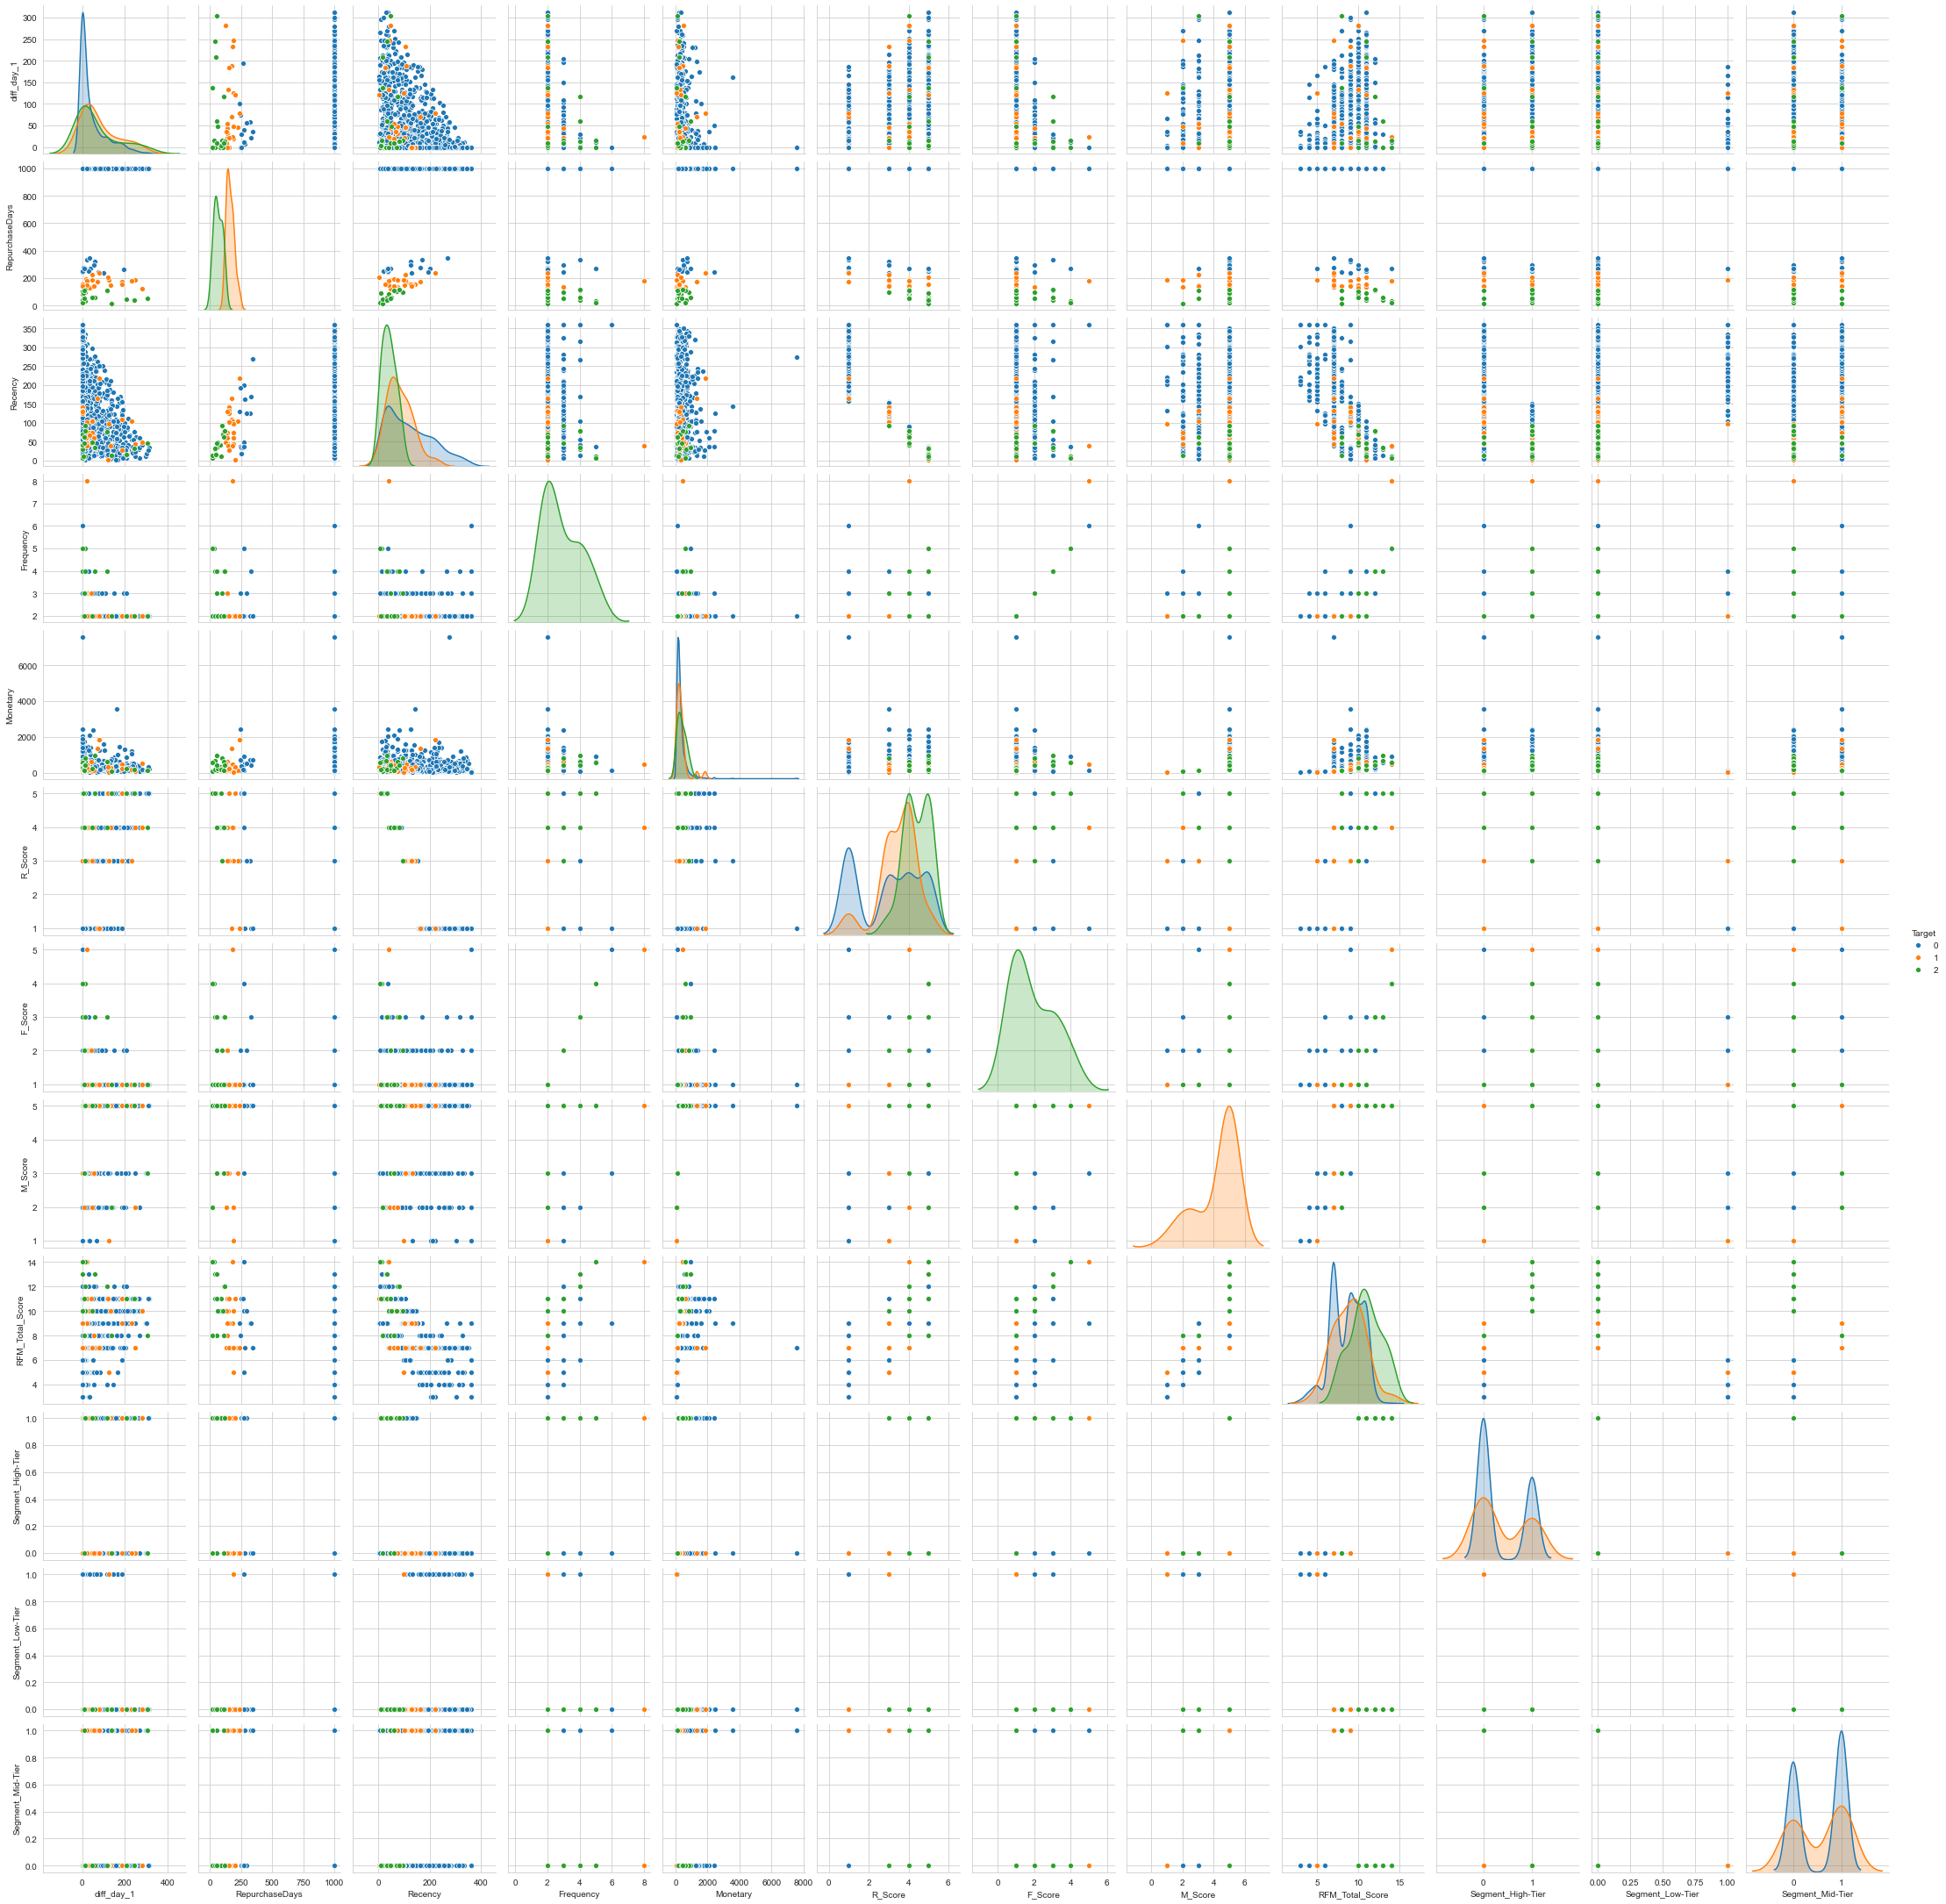

In [449]:
g = sns.pairplot(data_fin, hue='Target')

## Handling Outlier

In [450]:
def detect_lower_upper(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

In [451]:
detect_lower_upper(data_fin)

(diff_day_1          -103.500
 RepurchaseDays       999.000
 Recency             -172.500
 Frequency              2.000
 Monetary            -202.585
 R_Score               -3.500
 F_Score                1.000
 M_Score                5.000
 RFM_Total_Score        2.500
 Segment_High-Tier     -1.500
 Segment_Low-Tier       0.000
 Segment_Mid-Tier      -1.500
 Target                 0.000
 dtype: float64,
 diff_day_1           172.500
 RepurchaseDays       999.000
 Recency              399.500
 Frequency              2.000
 Monetary             740.095
 R_Score                8.500
 F_Score                1.000
 M_Score                5.000
 RFM_Total_Score       14.500
 Segment_High-Tier      2.500
 Segment_Low-Tier       0.000
 Segment_Mid-Tier       2.500
 Target                 0.000
 dtype: float64)

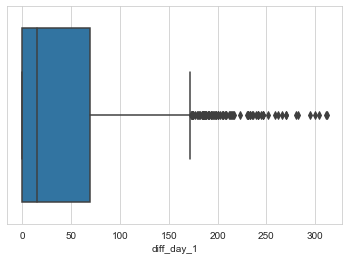

In [452]:
sns.boxplot(data_fin['diff_day_1'])

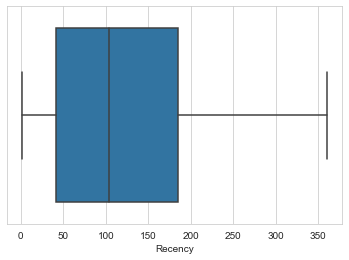

In [453]:
sns.boxplot(data_fin['Recency'])

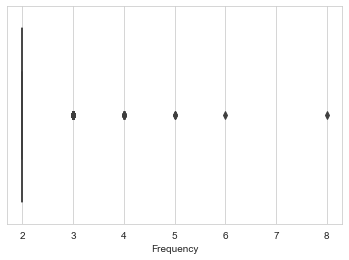

In [454]:
sns.boxplot(data_fin['Frequency'])

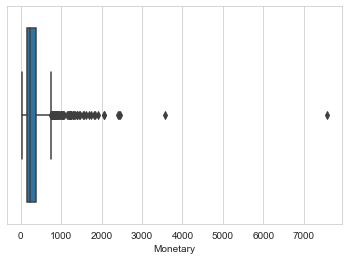

In [455]:
sns.boxplot(data_fin['Monetary'])

In [456]:
data_fin[data_fin['Monetary'] == data_fin['Monetary'].max()]

,diff_day_1,RepurchaseDays,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total_Score,Segment_High-Tier,Segment_Low-Tier,Segment_Mid-Tier,Target
884,0.0,999.0,274,2,7571.63,1,1,5,7,0,0,1,0


- Outlier tidak dihapus dari dataset karena outliernya sudah dilakukan binning dan juga jumlah outlier banyak, diharapkan dapat menjadi informasi baru bagi model.
- Hal ini perlu dimasukkan ke dalam model apakah mempengaruhi akurasi atau tidak.

## Feature Selection
- Fitur yang dipilih antara lain:
    - diff_day_1:
        - Merupakan rentang hari pelanggan melakukan pembelian minimum pada tahun 2018 dikurangi rentang hari pelanggan melakukan pembelian maksimum pada tahun 2017
    - recency:
        - Merupakan berapa lama sejak pelanggan melakukan pembelian
    - frequency: 
        - Seberapa sering pelanggan membeli dalam kurun waktu tertentu, kurun waktu transaksi dihitung dari awal waktu dan akhir waktu yang terdapat pada dataset
    - monetary: 
        - Jumlah nominal pengeluaran pelanggan dalam transaksi
    - R_Score:
        - Skor Recency setelah di binning menggunakan quintile
    - F_Score:
        - Skor Frequency setelah di binning menggunakan quintile
    - M_Score:
        - Skor Monetary setelah di binning menggunakan quintile
    - RFM_Total_Score:
        - Total penjumlahan R_Score, M_Score dan F_Score
    - Segment_High-Tier:
        - Bernilai 1 jika pelanggan merupakan Segmen pelanggan High-Tier 
    - Segment_Mid-Tier:
        - Bernilai 1 jika pelanggan merupakan Segmen pelanggan Mid-Tier
    - Segment_Low-Tier:
        - Bernilai 1 jika pelanggan merupakan Segmen pelanggan Low-Tier

In [479]:
X = data_fin[['diff_day_1', 'Recency', 'Frequency', 'Monetary',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Total_Score', 'Segment_High-Tier',
       'Segment_Low-Tier', 'Segment_Mid-Tier']]
y = data_fin['Target']

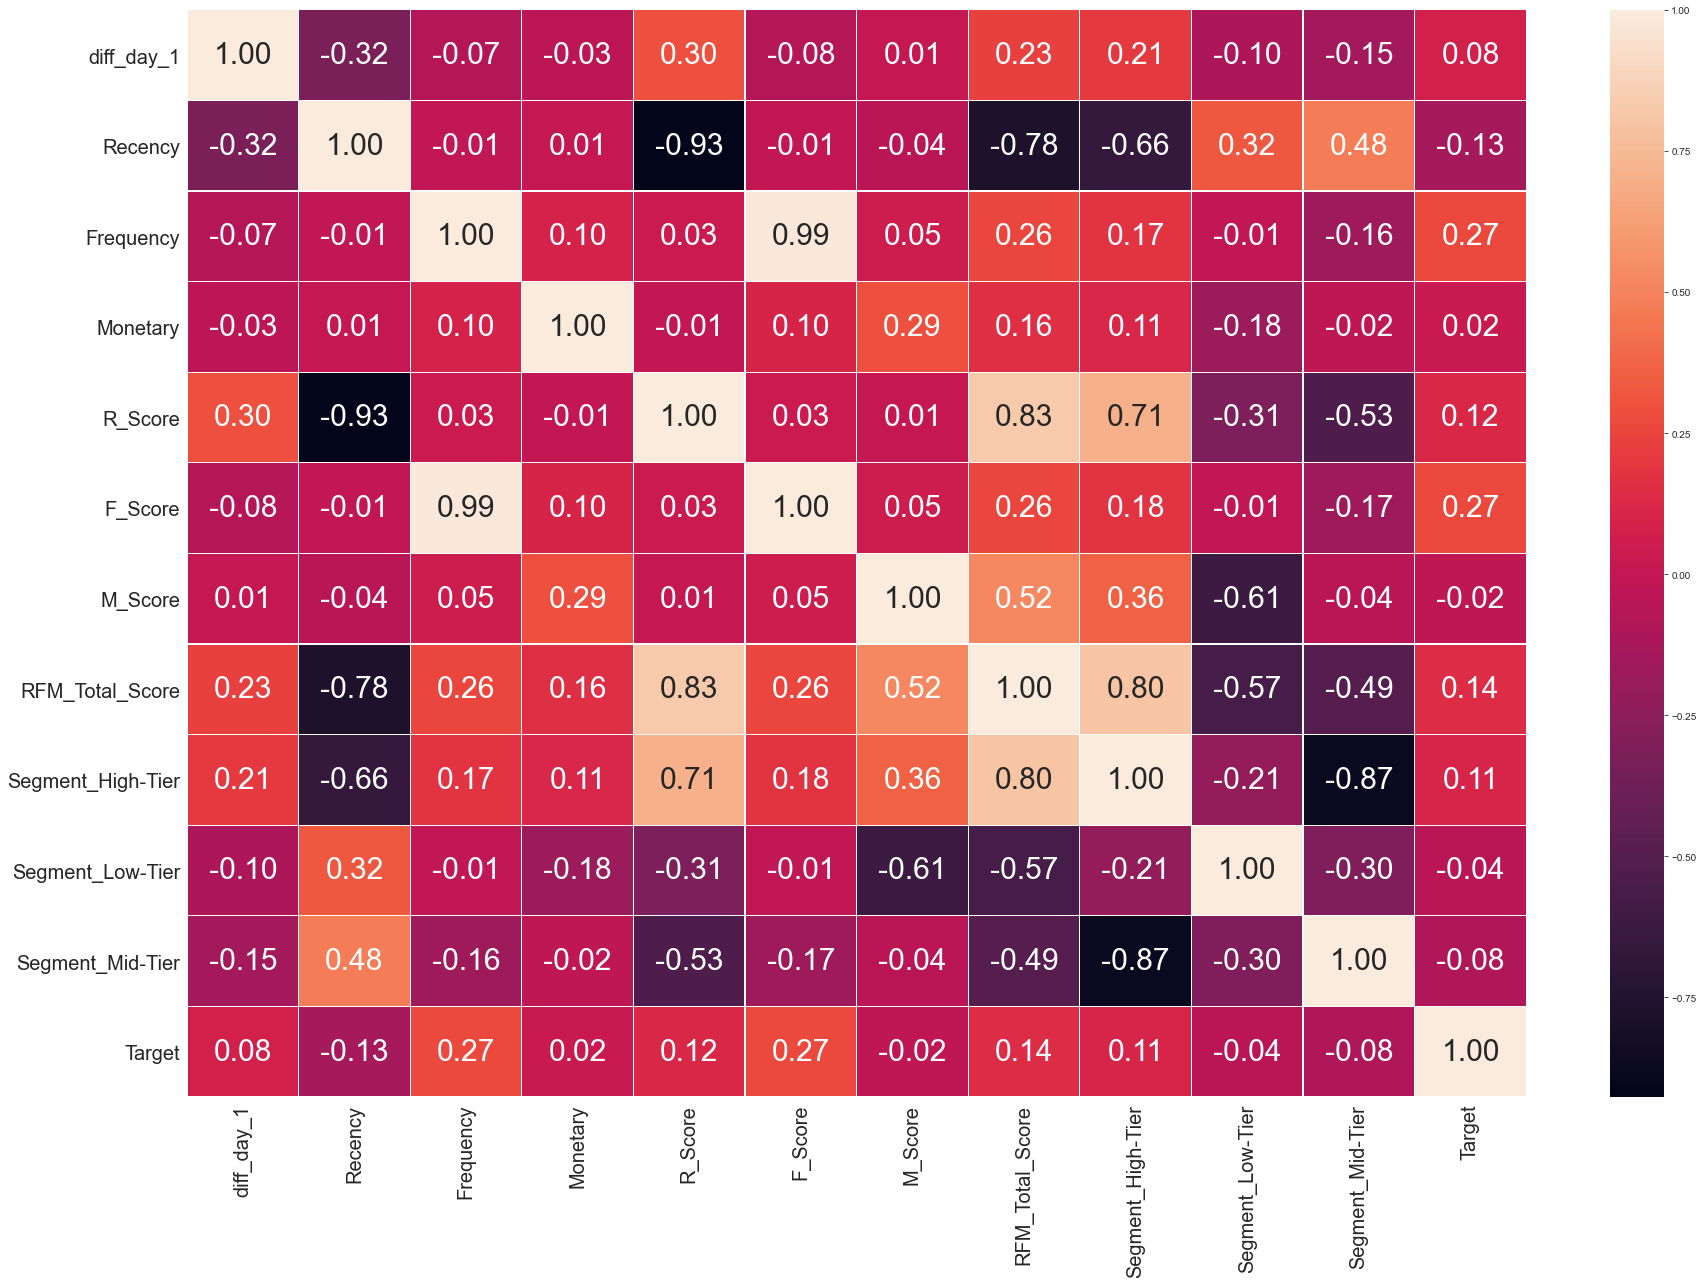

In [480]:
corr = data_fin[['diff_day_1', 'Recency', 'Frequency', 'Monetary',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Total_Score', 'Segment_High-Tier',
       'Segment_Low-Tier', 'Segment_Mid-Tier', 'Target']].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f", annot_kws={"size": 30})
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.show()

## Handling Imbalance Data
- Untuk menghandle imbalance data, dilakukan Synthetic Minority Over-sampling Technique 
- Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas 

In [481]:
y.value_counts()

0    999
1     25
2     17
Name: Target, dtype: int64

In [482]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [483]:
len(X)

2997

In [484]:
len(y)

2997

## Scaling Data
- Karena di dalam dataset terdapat outlier, maka digunakan Scaling RobustScaler. RobustScaler dapat menghandle outlier karena dilakukan perhitungan interquartile yang menghasilkan standar menjadi mean = 0 dan standar deviasi = 1

In [485]:
scaler = RobustScaler()

In [486]:
X = scaler.fit_transform(X)

## Binarize
- Membuat label baru terhadap target Class

In [487]:
y1 = label_binarize(y, classes=[0,1,2])
n_classes = 3

## Splitting Data
- Untuk menghindari overfitting data selanjutnya akan di split
- Splitting data juga bertujuan agar model yang telah di train dapat menghasilkan nilai baik juga pada data input lain yang baru

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, stratify=y, random_state=44)

In [489]:
X_train.shape

(2397, 11)

In [490]:
X_test.shape

(600, 11)

## Splitting Data for Hyperparameter Tuning

In [491]:
X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)


In [492]:
X_train.shape

(2397, 11)

In [493]:
y_train.shape

(2397, 3)

## Machine Learning Model

## 1. Logistic Regression

### 1. a. Logistic Regression Using OneVSRestClassifier

In [494]:
model1 = OneVsRestClassifier(LogisticRegression())
model1.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [495]:
y_pred_1 = model1.predict(X_test)

In [496]:
# y_pred_1

In [497]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

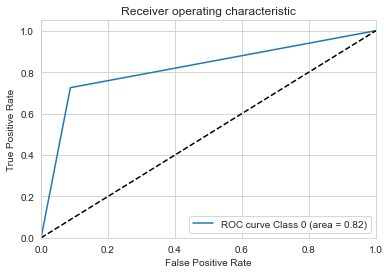

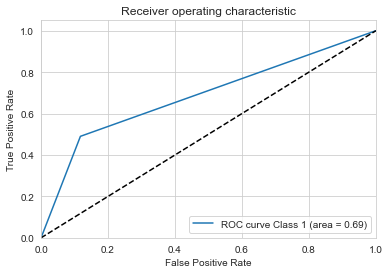

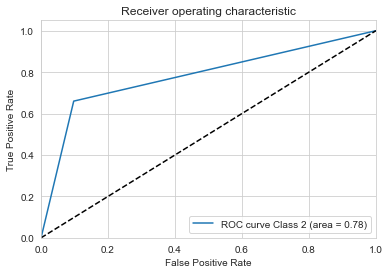

In [498]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [499]:
model_1_metrics_weighted = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_1) * 100, 
              recall_score(y_test, y_pred_1, average='weighted', labels=[2]) * 100,
              precision_score(y_test, y_pred_1, average='weighted', labels=[2]) * 100, 
              f1_score(y_test, y_pred_1, average='weighted', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Weighted Default (%)'])
model_1_metrics_weighted

,Score LR Weighted Default (%)
accuracy,54.833333
recall,66.000000
precision,77.192982
f1_score,71.159030


In [500]:
model_1_metrics_macro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_1) * 100, 
              recall_score(y_test, y_pred_1, average='macro', labels=[2]) * 100,
              precision_score(y_test, y_pred_1, average='macro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_1, average='macro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Macro Default (%)'])
model_1_metrics_macro

,Score LR Macro Default (%)
accuracy,54.833333
recall,66.000000
precision,77.192982
f1_score,71.159030


In [501]:
model_1_metrics_micro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_1) * 100, 
              recall_score(y_test, y_pred_1, average='micro', labels=[2]) * 100,
              precision_score(y_test, y_pred_1, average='micro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_1, average='micro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Micro Default (%)'])
model_1_metrics_micro

,Score LR Micro Default (%)
accuracy,54.833333
recall,66.000000
precision,77.192982
f1_score,71.159030


In [502]:
model_1_train_test = pd.DataFrame(data = 
                [model1.score(X_train, y_train) * 100,
                 model1.score(X_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score Logistic Regression Default (%)']
            )
model_1_train_test

,Score Logistic Regression Default (%)
Model Score in Data Train,54.109303
Model Score in Data Test,54.833333


In [503]:
# Precision label 2 menggunakan average: micro, macro dan weighted
model_1_precision = pd.DataFrame(data = 
            [ 
             precision_score(y_test, y_pred_1, average='micro', labels=[2]) * 100,
             precision_score(y_test, y_pred_1, average='macro', labels=[2]) * 100,
             precision_score(y_test, y_pred_1, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score Logistic Regression Default Class 2 (%)'])
             
model_1_precision

,Precision Score Logistic Regression Default Class 2 (%)
Micro,77.192982
Macro,77.192982
Weighted,77.192982


### 1. b. Logistic Regression After Tuning

In [504]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
multi_class=['auto', 'ovr', 'multinomial']

paramlog = {
    'penalty': penalty, 
    'solver': solver, 
    'max_iter': max_iter,
    'multi_class': multi_class}

paramlog

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000],
 'multi_class': ['auto', 'ovr', 'multinomial']}

In [505]:
model1_GS = GridSearchCV(LogisticRegression(), paramlog, cv=5, n_jobs=-1, verbose=1)

In [506]:
model1_GS.fit(X_train_ht, y_train_ht)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1142 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag',
                                    'saga']},
             verbose=1)

In [507]:
model1_GS.best_params_

{'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'saga'}

In [508]:
# Memasukan best param
model1_tuning = LogisticRegression(solver='saga', penalty = 'none', max_iter = 1000, multi_class='auto')
model1_tuning.fit(X_train_ht, y_train_ht)

LogisticRegression(max_iter=1000, penalty='none', solver='saga')

In [509]:
y_pred1_tuning = model1_tuning.predict(X_test_ht)

model_1_tuning_metrics_weighted = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred1_tuning) * 100, 
    recall_score(y_test_ht, y_pred1_tuning, average='weighted', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred1_tuning, average='weighted', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred1_tuning, average='weighted', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Tuning Weighted (%)'])
model_1_tuning_metrics_weighted

,Score LR Tuning Weighted (%)
accuracy,74.333333
recall,82.500000
precision,73.991031
f1_score,78.014184


In [510]:
model_1_tuning_metrics_macro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred1_tuning) * 100, 
    recall_score(y_test_ht, y_pred1_tuning, average='macro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred1_tuning, average='macro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred1_tuning, average='macro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Tuning Macro (%)'])
model_1_tuning_metrics_macro

,Score LR Tuning Macro (%)
accuracy,74.333333
recall,82.500000
precision,73.991031
f1_score,78.014184


In [511]:
model_1_tuning_metrics_micro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred1_tuning) * 100, 
    recall_score(y_test_ht, y_pred1_tuning, average='micro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred1_tuning, average='micro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred1_tuning, average='micro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score LR Tuning Micro (%)'])
model_1_tuning_metrics_micro

,Score LR Tuning Micro (%)
accuracy,74.333333
recall,82.500000
precision,73.991031
f1_score,78.014184


In [512]:
model_1_tuning_train_test = pd.DataFrame(data = 
                [model1_tuning.score(X_train_ht, y_train_ht)*100,
                    model1_tuning.score(X_test_ht, y_test_ht)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score Logistic Regression Tuning (%)']
            )
model_1_tuning_train_test

,Score Logistic Regression Tuning (%)
Model Score in Data Train,73.383396
Model Score in Data Test,74.333333


In [513]:
# Precision label 2 menggunakan average: micro, macro dan weighted
model_1_tuning_precision = pd.DataFrame(data = 
            [precision_score(y_test_ht, y_pred1_tuning, average='micro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred1_tuning, average='macro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred1_tuning, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score Logistic Regression Tuning Class 2 (%)'])
             
model_1_tuning_precision

,Precision Score Logistic Regression Tuning Class 2 (%)
Micro,73.991031
Macro,73.991031
Weighted,73.991031


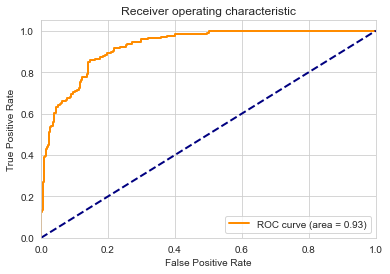

In [514]:
y_prob1_tuning = model1_tuning.predict_proba(X_test_ht)
# macro_roc_auc_ovo = roc_auc_score(y_test_ht, y_prob1_tuning , multi_class="ovo",
#                                   average="macro")
# macro_roc_auc_ovo
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob1_tuning[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
# Plot untuk Class 0
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [515]:
# y_prob1_tuning

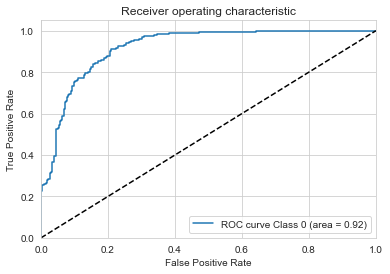

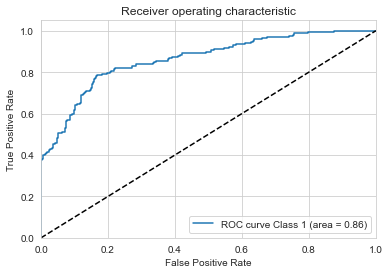

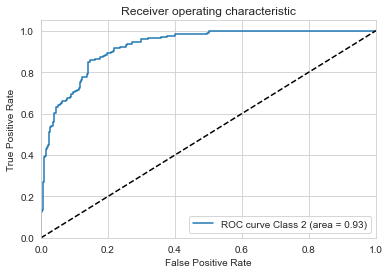

In [516]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## 2. KNN Classifier

### 2. a. KNN Classifier Using OneVSRestClassifier

In [517]:
# scaling mempengaruhi KNN
# n neighbors: default 5
model2 = OneVsRestClassifier(KNeighborsClassifier())

In [518]:
model2.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [519]:
y_pred_2 = model2.predict(X_test)

In [520]:
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_pred_2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])


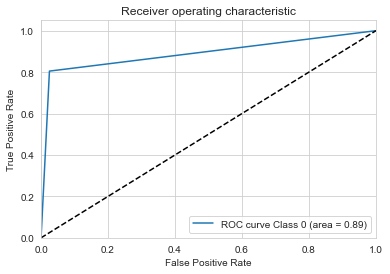

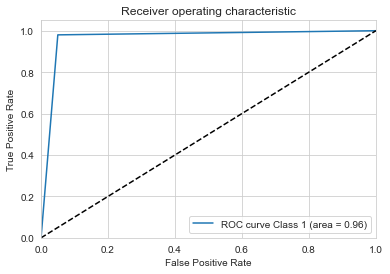

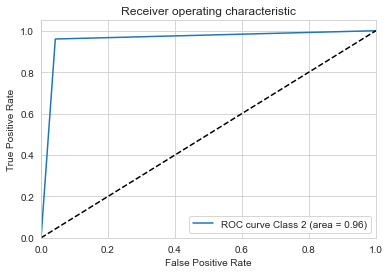

In [521]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr2[i], tpr2[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc2[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [522]:
model_2_metrics_weighted = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_2) * 100, 
              recall_score(y_test, y_pred_2, average='weighted', labels=[2]) * 100,
              precision_score(y_test, y_pred_2, average='weighted', labels=[2]) * 100, 
              f1_score(y_test, y_pred_2, average='weighted', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Default Weighted (%)'])
model_2_metrics_weighted

,Score KNN Default Weighted (%)
accuracy,91.500000
recall,96.000000
precision,91.866029
f1_score,93.887531


In [523]:
model_2_metrics_macro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_2) * 100, 
              recall_score(y_test, y_pred_2, average='macro', labels=[2]) * 100,
              precision_score(y_test, y_pred_2, average='macro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_2, average='macro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Default Macro (%)'])
model_2_metrics_macro

,Score KNN Default Macro (%)
accuracy,91.500000
recall,96.000000
precision,91.866029
f1_score,93.887531


In [524]:
model_2_metrics_micro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_2) * 100, 
              recall_score(y_test, y_pred_2, average='micro', labels=[2]) * 100,
              precision_score(y_test, y_pred_2, average='micro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_2, average='micro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Default Micro (%)'])
model_2_metrics_micro

,Score KNN Default Micro (%)
accuracy,91.500000
recall,96.000000
precision,91.866029
f1_score,93.887531


In [525]:
model_2_train_test = pd.DataFrame(
        data = [model2.score(X_train, y_train) * 100,
                model2.score(X_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score KNN Default (%)']
            )
model_2_train_test

,Score KNN Default (%)
Model Score in Data Train,95.577806
Model Score in Data Test,91.500000


In [526]:
# Precision label 2 menggunakan average: micro, macro dan weighted
model_2_precision = pd.DataFrame(data = 
            [precision_score(y_test, y_pred_2, average='micro', labels=[2]) * 100,
             precision_score(y_test, y_pred_2, average='macro', labels=[2]) * 100,
             precision_score(y_test, y_pred_2, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score KNN Default Class 2 (%)'])
             
model_2_precision

,Precision Score KNN Default Class 2 (%)
Micro,91.866029
Macro,91.866029
Weighted,91.866029


### 2. b. KNN  Classifier After Tuning

In [527]:
k = round((len(X_train)) ** 0.5) + 1

paramKNN = {
    'n_neighbors' : range(k-round(k/2) , k*2), 
    'weights' : ['uniform', 'distance'], 
    'p': [2, 1]
}

In [528]:
model2_GS = GridSearchCV(KNeighborsClassifier(), paramKNN, cv = 5, n_jobs=-1, verbose=1)
model2_GS.fit(X_train_ht, y_train_ht)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   17.8s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(25, 100), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [529]:
model2_GS.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'distance'}

In [530]:
# Memasukan best param
model2_tuning = KNeighborsClassifier(n_neighbors=26, weights='distance', p=1)
model2_tuning.fit(X_train_ht, y_train_ht)

KNeighborsClassifier(n_neighbors=26, p=1, weights='distance')

In [531]:
y_pred2_tuning = model2_tuning.predict(X_test_ht)

model_2_tuning_metrics_weighted = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred2_tuning) * 100, 
    recall_score(y_test_ht, y_pred2_tuning, average='weighted', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred2_tuning, average='weighted', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred2_tuning, average='weighted', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Tuning Weighted (%)'])
model_2_tuning_metrics_weighted

,Score KNN Tuning Weighted (%)
accuracy,91.000000
recall,97.500000
precision,91.981132
f1_score,94.660194


In [532]:
model_2_tuning_metrics_macro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred2_tuning) * 100, 
    recall_score(y_test_ht, y_pred2_tuning, average='macro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred2_tuning, average='macro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred2_tuning, average='macro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Tuning Macro (%)'])
model_2_tuning_metrics_macro

,Score KNN Tuning Macro (%)
accuracy,91.000000
recall,97.500000
precision,91.981132
f1_score,94.660194


In [533]:
model_2_tuning_metrics_micro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred2_tuning) * 100, 
    recall_score(y_test_ht, y_pred2_tuning, average='micro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred2_tuning, average='micro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred2_tuning, average='micro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score KNN Tuning Micro (%)'])
model_2_tuning_metrics_micro

,Score KNN Tuning Micro (%)
accuracy,91.000000
recall,97.500000
precision,91.981132
f1_score,94.660194


In [534]:
model_2_tuning_train_test = pd.DataFrame(data = [model2_tuning.score(X_train_ht, y_train_ht)*100,
                    model2_tuning.score(X_test_ht, y_test_ht)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score KNN Tuning (%)']
            )
model_2_tuning_train_test

,Score KNN Tuning (%)
Model Score in Data Train,100.0
Model Score in Data Test,91.0


In [535]:
# Recall label 2 menggunakan average: micro, macro dan weighted
model_2_tuning_precision = pd.DataFrame(data = 
            [precision_score(y_test_ht, y_pred2_tuning, average='micro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred2_tuning, average='macro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred2_tuning, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score KNN Tuning Class 2 (%)'])
             
model_2_tuning_precision

,Precision Score KNN Tuning Class 2 (%)
Micro,91.981132
Macro,91.981132
Weighted,91.981132


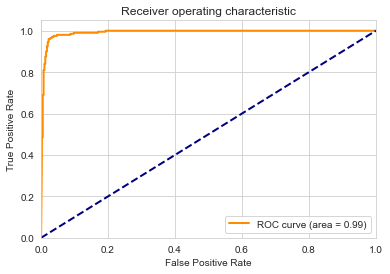

In [536]:
y_prob2_tuning = model2_tuning.predict_proba(X_test_ht)
# macro_roc_auc_ovo = roc_auc_score(y_test_ht, y_prob1_tuning , multi_class="ovo",
#                                   average="macro")
# macro_roc_auc_ovo
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob2_tuning[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
# Plot untuk Class 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

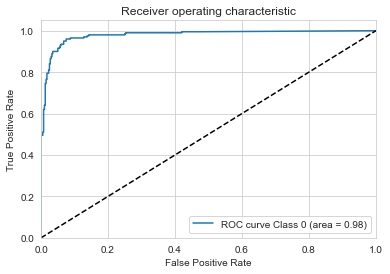

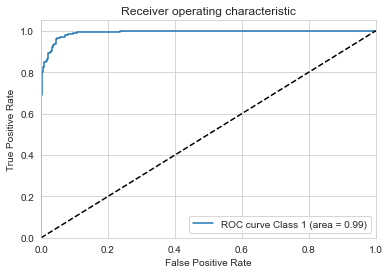

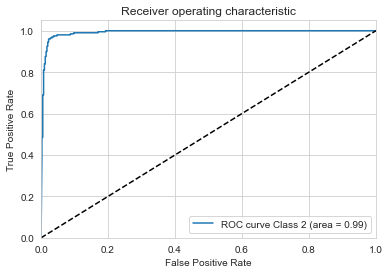

In [537]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## 3. Random Forest Classifier

### 3. a. Random Forest Classifier Using OneVSRestClassifier

In [538]:
model3 = OneVsRestClassifier(RandomForestClassifier())

In [539]:
model3.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [540]:
y_pred_3 = model3.predict(X_test)

model_3_metrics_weighted = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_3) * 100, 
              recall_score(y_test, y_pred_3, average='weighted', labels=[2]) * 100,
              precision_score(y_test, y_pred_3, average='weighted', labels=[2]) * 100, 
              f1_score(y_test, y_pred_3, average='weighted', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Classifier Default (%)'])
model_3_metrics_weighted

,Score Random Forest Classifier Default (%)
accuracy,95.333333
recall,96.000000
precision,97.461929
f1_score,96.725441


In [541]:
model_3_metrics_macro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_3) * 100, 
              recall_score(y_test, y_pred_3, average='macro', labels=[2]) * 100,
              precision_score(y_test, y_pred_3, average='macro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_3, average='macro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Classifier Default (%)'])
model_3_metrics_macro

,Score Random Forest Classifier Default (%)
accuracy,95.333333
recall,96.000000
precision,97.461929
f1_score,96.725441


In [542]:
model_3_metrics_micro = pd.DataFrame(data = 
             [accuracy_score(y_test, y_pred_3) * 100, 
              recall_score(y_test, y_pred_3, average='micro', labels=[2]) * 100,
              precision_score(y_test, y_pred_3, average='micro', labels=[2]) * 100, 
              f1_score(y_test, y_pred_3, average='micro', labels=[2]) * 100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Classifier Default (%)'])
model_3_metrics_micro

,Score Random Forest Classifier Default (%)
accuracy,95.333333
recall,96.000000
precision,97.461929
f1_score,96.725441


In [543]:
# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test[:, i], y_pred_3[:, i])
    roc_auc2[i] = auc(fpr3[i], tpr3[i])


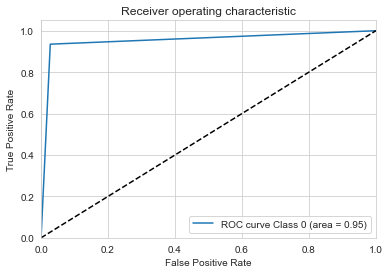

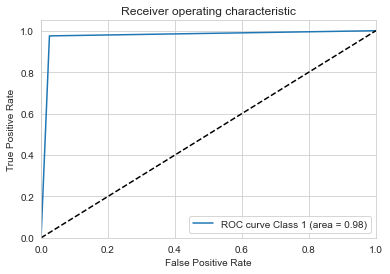

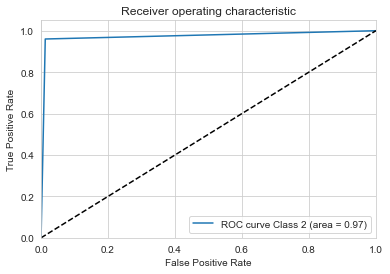

In [544]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr3[i], tpr3[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc2[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [546]:
model_3_train_test = pd.DataFrame(
        data = [model3.score(X_train, y_train) * 100,
                model3.score(X_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score Random Forest Classifier Default (%)']
            )
model_3_train_test

,Score Random Forest Classifier Default (%)
Model Score in Data Train,100.000000
Model Score in Data Test,95.333333


In [547]:
# Precision label 2 menggunakan average: micro, macro dan weighted
model_3_precision = pd.DataFrame(data = 
            [
             precision_score(y_test, y_pred_3, average='micro', labels=[2]) * 100,
             precision_score(y_test, y_pred_3, average='macro', labels=[2])* 100,
             precision_score(y_test, y_pred_3, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score Random Forest Classifier Default Class 2 (%)'])
             
model_3_precision

,Precision Score Random Forest Classifier Default Class 2 (%)
Micro,97.461929
Macro,97.461929
Weighted,97.461929


### 3. b. Random Forest Classifier After Tuning

In [548]:
paramRF = {
    'n_estimators': [100, 200, 250, 300, 400, 500],
    'max_depth': range(1, 10),
    'max_features': ['sqrt', 'log2'],
}

In [549]:
model3_GS = GridSearchCV(RandomForestClassifier(), paramRF, cv=5, n_jobs=-1, verbose=1)
model3_GS.fit(X_train_ht, y_train_ht)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 250, 300, 400, 500]},
             verbose=1)

In [550]:
model3_GS.best_params_

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 250}

In [551]:
# Memasukan best param
model3_tuning = RandomForestClassifier(n_estimators=250, max_features='log2', max_depth=9)
model3_tuning.fit(X_train_ht, y_train_ht)

RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=250)

In [552]:
y_pred3_tuning = model3_tuning.predict(X_test_ht)

model_3_tuning_metrics_weighted = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred3_tuning) * 100, 
    recall_score(y_test_ht, y_pred3_tuning, average='weighted', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred3_tuning, average='weighted', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred3_tuning, average='weighted', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Tuning (%)'])
model_3_tuning_metrics_weighted

,Score Random Forest Tuning (%)
accuracy,94.333333
recall,95.500000
precision,96.464646
f1_score,95.979899


In [553]:
# y_pred3_tuning

In [554]:
# pd.DataFrame(X_test_ht)

In [555]:
model_3_tuning_metrics_macro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred3_tuning) * 100, 
    recall_score(y_test_ht, y_pred3_tuning, average='macro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred3_tuning, average='macro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred3_tuning, average='macro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Tuning (%)'])
model_3_tuning_metrics_macro

,Score Random Forest Tuning (%)
accuracy,94.333333
recall,95.500000
precision,96.464646
f1_score,95.979899


In [556]:
model_3_tuning_metrics_micro = pd.DataFrame(data = [
    accuracy_score(y_test_ht, y_pred3_tuning) * 100, 
    recall_score(y_test_ht, y_pred3_tuning, average='micro', labels=[2]) * 100,
    precision_score(y_test_ht, y_pred3_tuning, average='micro', labels=[2]) * 100, 
    f1_score(y_test_ht, y_pred3_tuning, average='micro', labels=[2]) * 100],
index = ['accuracy', 'recall', 'precision', 'f1_score'],
            columns = ['Score Random Forest Tuning (%)'])
model_3_tuning_metrics_micro

,Score Random Forest Tuning (%)
accuracy,94.333333
recall,95.500000
precision,96.464646
f1_score,95.979899


In [557]:
model_3_tuning_train_test = pd.DataFrame(data = [model3_tuning.score(X_train_ht, y_train_ht)*100,
                    model3_tuning.score(X_test_ht, y_test_ht)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score Random Forest Tuning (%)']
            )
model_3_tuning_train_test

,Score Random Forest Tuning (%)
Model Score in Data Train,97.329996
Model Score in Data Test,94.333333


In [558]:
# Precision label 2 menggunakan average: micro, macro dan weighted
model_3_tuning_precision = pd.DataFrame(data = 
            [precision_score(y_test_ht, y_pred3_tuning, average='micro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred3_tuning, average='macro', labels=[2]) * 100,
             precision_score(y_test_ht, y_pred3_tuning, average='weighted', labels=[2]) * 100
            ],
            index = ['Micro', 'Macro', 'Weighted'],
            columns = ['Precision Score Random Forest Tuning Class 2 (%)'])
             
model_3_tuning_precision

,Precision Score Random Forest Tuning Class 2 (%)
Micro,96.464646
Macro,96.464646
Weighted,96.464646


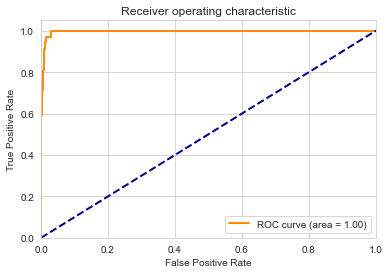

In [559]:
y_prob3_tuning = model3_tuning.predict_proba(X_test_ht)
# macro_roc_auc_ovo = roc_auc_score(y_test_ht, y_prob1_tuning , multi_class="ovo",
#                                   average="macro")
# macro_roc_auc_ovo
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob3_tuning[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
# Plot untuk Class 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

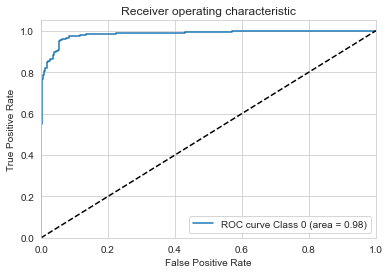

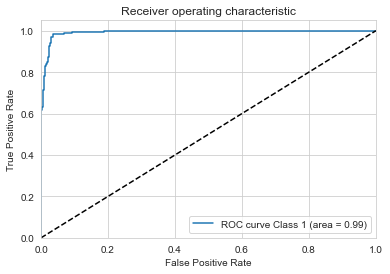

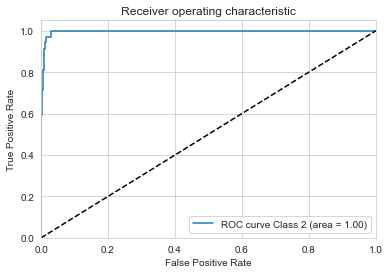

In [560]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve Class {i} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

<!-- ## Accuracy
Jika Data Imbalance ==> Akurasi Tidak bisa digunakan karena BIAS, Kecuali Data Memiliki Feature yang Distinct
(Berbeda secara signifikan antar Class)

Akurasi adalah Perbadingan **SELURUH TEBAKAN BENAR** dibanding **SELURUH DATA**

\begin{equation}
Accuracy = \frac{TP+TN}{(TP+FP + TN+FN)}
\end{equation}

## Precision

- Jika Target Kita mendapatkan **False Positive Sekecil** Mungkin

Contoh :
   - Klasifikasi Email SPAM dan NON - SPAM
   - Kebanyakan Email Non-SPAM hanya ada beberapa yang SPAM
   - Efek Akan Fatal JIka EMail Non - SPAM kita anggap SPAM (False Positive)
   
   \begin{equation}
Precision = \frac{TP}{(TP+FP)}
\end{equation}

- **Precision Positif** adalah **JUMLAH TEBAKAN BENAR DI KELAS POSITIF** dibanding **SELURUH _TEBAKAN_ POSITIF**

## Recall
- Jika Target Kita mendapatkan **False Negative Sekecil Mungkin**

COntoh :

- Klasifikasi Covid dan Non-Covid (Untuk Mendeteksi Covid)
- Dataset Kebanyakan adalah Non-Covid dibanding Covid
- Efek Akan Fatal Jika Pasien **Covid** kita Anggap **Non-Covid**

\begin{equation}
Recall = \frac{TP}{(TP+FN)}
\end{equation}

- **Precision Positif** adalah **JUMLAH TEBAKAN BENAR DI KELAS POSITIF** dibanding **SELURUH DATA _AKTUAL_ POSITIF** -->

## Metrics

### 1. Logistic Regression Before Tuning and After Tuning

In [561]:
# Before Tuning: y_pred_1
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       200
           1       0.68      0.49      0.57       200
           2       0.77      0.66      0.71       200

   micro avg       0.76      0.62      0.68       600
   macro avg       0.75      0.62      0.68       600
weighted avg       0.75      0.62      0.68       600
 samples avg       0.59      0.62      0.60       600



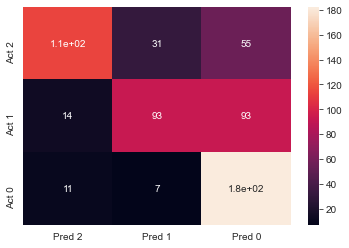

In [562]:
# Logistic Regression Before Tuning
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1), labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2', 'Pred 1', 'Pred 0'], index=['Act 2','Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [563]:
# After Tuning: y_pred1_tuning
print(classification_report(y_test_ht, y_pred1_tuning))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       200
           1       0.76      0.61      0.68       200
           2       0.74      0.82      0.78       200

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



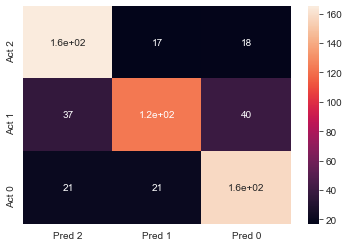

In [564]:
# Logistic Regression After Tuning
cm = confusion_matrix(y_test_ht, y_pred1_tuning, labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2', 'Pred 1', 'Pred 0'], index=['Act 2', 'Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

### 2. KNN Before Tuning and After Tuning

In [565]:
# Before Tuning: y_pred_2
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       200
           1       0.91      0.98      0.94       200
           2       0.92      0.96      0.94       200

   micro avg       0.92      0.92      0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600
 samples avg       0.92      0.92      0.92       600



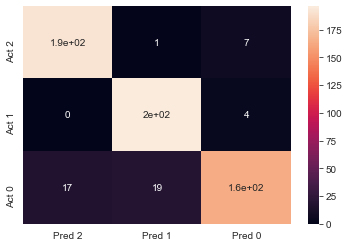

In [566]:
# KNN Before Tuning
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_2, axis=1), labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2','Pred 1', 'Pred 0'], index=['Act 2', 'Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [567]:
# After Tuning: y_pred2_tuning
print(classification_report(y_test_ht, y_pred2_tuning))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       200
           1       0.87      0.98      0.92       200
           2       0.92      0.97      0.95       200

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



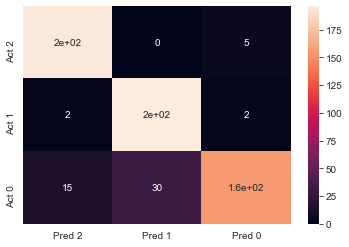

In [568]:
# KNN After Tuning
cm = confusion_matrix(y_test_ht, y_pred2_tuning, labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2', 'Pred 1', 'Pred 0'], index=['Act 2', 'Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

### 3. RandomForest Before Tuning and After Tuning

In [569]:
# Before Tuning: y_pred_3
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       200
           1       0.95      0.97      0.96       200
           2       0.97      0.96      0.97       200

   micro avg       0.96      0.96      0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600
 samples avg       0.95      0.96      0.96       600



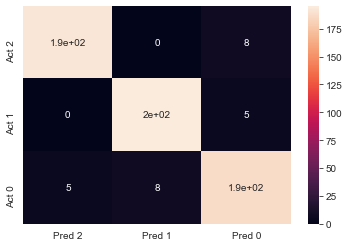

In [570]:
# Random ForestBefore Tuning
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_3, axis=1), labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2', 'Pred 1', 'Pred 0'], index=['Act 2', 'Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [571]:
# After Tuning: y_pred3_tuning
print(classification_report(y_test_ht, y_pred3_tuning))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       200
           1       0.92      0.98      0.95       200
           2       0.96      0.95      0.96       200

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



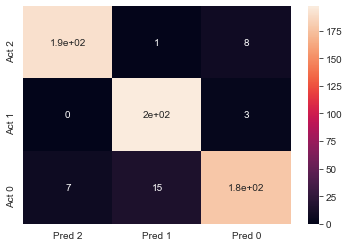

In [572]:
# RF After Tuning
cm = confusion_matrix(y_test_ht, y_pred3_tuning, labels=[2, 1, 0])
df = pd.DataFrame(cm, columns=['Pred 2', 'Pred 1', 'Pred 0'], index=['Act 2', 'Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

## Perbandingan Model

- Tujuan pemodelan ini adalah mendeteksi pelanggan Class 0 (Pelanggan berpotensi Churn) agar tidak salah prediksi menjadi Class 1 atau Class 2
- Oleh karena itu, Recall Class 0 akan difokuskan dalam model ini karena Pelanggan tidak ingin salah diprediksi Class 1 atau Class 2
- Jika salah prediksi Class 1 dan Class 2 pada pelanggan Class 0, maka treatment (seperti pemberian promo/diskon atau kupon) tidak akan bisa dilakukan pada pelanggan berpotensi churn yang menyebabkan pelanggan bisa meninggalkan perusahaan atau berbelanja pada produk perusahaan lain
- Perusahaan tidak ingin kehilangan pelanggan karena kehilangan pelanggan dapat merugikan perusahaan, dan juga dapat menambah pengeluaran perusahaan karena mendapatkan pelanggan baru lebih mengeluarkan banyak biaya dibandingkan meng-upgrade pelayanan kepada pelanggan yang sudah ada

In [573]:
pd.concat([model_1_precision,
           model_1_tuning_precision, 
           model_2_precision,
           model_2_tuning_precision,
           model_3_precision,
           model_3_tuning_precision,
           ], axis=1)

,Precision Score Logistic Regression Default Class 2 (%),Precision Score Logistic Regression Tuning Class 2 (%),Precision Score KNN Default Class 2 (%),Precision Score KNN Tuning Class 2 (%),Precision Score Random Forest Classifier Default Class 2 (%),Precision Score Random Forest Tuning Class 2 (%)
Micro,77.192982,73.991031,91.866029,91.981132,97.461929,96.464646
Macro,77.192982,73.991031,91.866029,91.981132,97.461929,96.464646
Weighted,77.192982,73.991031,91.866029,91.981132,97.461929,96.464646


In [574]:
pd.concat([
    model_1_metrics_micro,
    model_1_tuning_metrics_micro,
    model_2_metrics_micro,
    model_2_tuning_metrics_micro,
    model_3_metrics_micro,
    model_3_tuning_metrics_micro
], axis=1)

,Score LR Micro Default (%),Score LR Tuning Micro (%),Score KNN Default Micro (%),Score KNN Tuning Micro (%),Score Random Forest Classifier Default (%),Score Random Forest Tuning (%)
accuracy,54.833333,74.333333,91.500000,91.000000,95.333333,94.333333
recall,66.000000,82.500000,96.000000,97.500000,96.000000,95.500000
precision,77.192982,73.991031,91.866029,91.981132,97.461929,96.464646
f1_score,71.159030,78.014184,93.887531,94.660194,96.725441,95.979899


In [575]:
pd.concat([model_1_train_test, model_1_tuning_train_test, model_2_train_test, model_2_tuning_train_test, model_3_train_test, model_3_tuning_train_test], axis=1)



,Score Logistic Regression Default (%),Score Logistic Regression Tuning (%),Score KNN Default (%),Score KNN Tuning (%),Score Random Forest Classifier Default (%),Score Random Forest Tuning (%)
Model Score in Data Train,54.109303,73.383396,95.577806,100.0,100.000000,97.329996
Model Score in Data Test,54.833333,74.333333,91.500000,91.0,95.333333,94.333333


- Melihat Precision Score untuk ketiga average (Micro, Macro dan Weighted) menghasilkan Score yang sama untuk setiap model
- Model Random Forest Default memiliki Precision Class 2 yang paling tinggi, namun model ini merupakan model yang overfit karena model di Data Train Score nya mencapai 100% dibanding dengan model yang diuji pada Data Test yang berkisar 96%. Overfit dapat menyebabkan jika model diaplikasikan pada data baru tidak dapat tergeneralisasi dengan baik. Selain itu, kepercayaan terhadap model menjadi rendah karena overfitting walaupun nilai Precisionnya lebih tingga
- Oleh karena itu, model Random Forest dengan Tuning akan dipilih dalam melakukan prediksi, dengan nilai Precision sekitar 96.5%

In [576]:
data_fin.columns

Index(['diff_day_1', 'RepurchaseDays', 'Recency', 'Frequency', 'Monetary',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Total_Score', 'Segment_High-Tier',
       'Segment_Low-Tier', 'Segment_Mid-Tier', 'Target'],
      dtype='object')

## Kesimpulan

- Modeling ini dilakukan untuk memprediksi pelanggan dengan kemungkinan pelanggan yang membeli kembali dalam waktu kurang dari 4 bulan (Class 2) dengan predictor 'diff_day_1', 'RepurchaseDays', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Total_Score', 'Segment_High-Tier', 'Segment_Low-Tier', 'Segment_Mid-Tier'
- Pelanggan yang melakukan pembelian kembali dalam kurun waktu tersebut diprediksi akan membeli kembali pada waktu kurang dari 4 bulan
- Oleh karena itu, perusahaan tidak memberikan discount/promo pada pelanggan tersebut karena sudah diprediksi akan membeli lagi
- Precision Class 2 (Pelanggan Gold) difokuskan pada model ini karena perusahaan lebih baik mengurangi salah memprediksi Class 2 sebagai aktual Class 0 atau Class 1
- Jika salah prediksi Class 2 padahal aktualnya Class 0 atau Class 1, karena Class 2 tidak diberikan promo, pelanggan yang salah prediksi tersebut (yakni aktual Class 0 atau Class 1) ikut tidak mendapatkan promo sehingga yang dapat menyebabkan pelanggan tersebut churn


## Export Model

In [577]:
import pickle
import joblib

with open('olistModelRF', 'wb') as ML:
    pickle.dump(model3_tuning, ML)